# [NLP] Vocabulary Size를 변경하여 머신러닝 모델학습 시도해보기

| 평가문항 | 상세기준 |
| :---: | :---: |
| 1. 분류 모델의 accuracy가 기준 이상 높게 나왔는가? | 3가지 단어 개수에 대해 8가지 머신러닝 기법을 적용하여 그중 최적의 솔루션을 도출하였다. |
| 2. 분류 모델의 F1 score가 기준 이상 높게 나왔는가? | Vocabulary size에 따른 각 머신러닝 모델의 성능변화 추이를 살피고, 해당 머신러닝 알고리즘의 특성에 근거해 원인을 분석하였다. |
| 3. 딥러닝 모델을 활용해 성능이 비교 및 확인되었는가? | 동일한 데이터셋과 전처리 조건으로 딥러닝 모델의 성능과 비교하여 결과에 따른 원인을 분석하였다. |

In [89]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

## (1) 단어 10000개 사용하여 모델 비교

num_words는 이 데이터에서 빈도수 기준으로 상위 몇 번째 단어까지 사용할 것인지 조절함.

빈도수가 많은 순서대로 나열했을 때, num_words의 인자로 준 정숫값만큼의 단어를 사용하고 나머지 단어는 전부 로 처리하는 원리

In [ ]:
# (x_train, y_train),(x_test,y_test) = reuters.load_data(num_words = 10000, test_split = 0.2 )

In [ ]:
# print('훈련 샘플 수 : {}'.format(len(x_train)))
# print('테스트 샘플 수 : {}'.format(len(x_test)))

In [88]:
# num_classes = max(y_train) +1
# print('클래스의 수: {}'.format(num_classes))

In [ ]:
# print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(i)for i in x_train)))
# print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

# plt.hist([len(s) for s in x_train], bins=50)  #bins : 막대(bins)의 갯수
# plt.xlabel('length of samples')
# plt.ylabel('number of samples')
# plt.show()

In [ ]:
# word_index = reuters.get_word_index(path='reuters_word_index.json')

In [ ]:
# for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
#     index_to_word[index]=token

In [ ]:
# print(' '.join([index_to_word[index] for index in x_train[3]]))# 빈칸에다가 join시킴

In [ ]:
# decoded = []
# for i in range(len(x_train)):
#     t = ' '.join([index_to_word[index] for index in x_train[i]])
#     decoded.append(t)
    
# x_train= decoded

# print(len(x_train))

In [ ]:
# decoded = []
# for i in range(len(x_test)):
#     t = ' '.join([index_to_word[index] for index in x_test[i]])
#     decoded.append(t)
    
# x_test= decoded

# print(len(x_test))

In [ ]:
# dtmvector = CountVectorizer()
# x_train_dtm = dtmvector.fit_transform(x_train)
# print(x_train_dtm.shape)

In [ ]:
# tfidf_transformer = TfidfTransformer()
# tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
# print(tfidfv.shape)

In [ ]:
# mod, cb, lr, lsvc, tree_, forest, grbt, voting_classifier = train_ml(tfidfv, y_train, tfidfv_test, y_test)

## (2) 단어 5000개 사용하여 모델 비교

In [2]:
(x_train_5k, y_train_5k), (x_test_5k, y_test_5k) = reuters.load_data(num_words=5000, test_split=0.2)

2121728/2110848 [==============================] - 0s 0us/step


In [3]:
word_index = reuters.get_word_index(path='reuters_word_index.json')

565248/550378 [==============================] - 0s 0us/step


In [4]:
index_to_word = { index + 3 : word for word, index in word_index.items()} # items는 key와 value값을 가져옴.

In [8]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

In [9]:
decoded = []
for i in range(len(x_train_5k)):
    t = ' '.join([index_to_word[index] for index in x_train_5k[i]])
    decoded.append(t)

x_train_5k = decoded

In [10]:
decoded = []
for i in range(len(x_test_5k)):
    t = ' '.join([index_to_word[index] for index in x_test_5k[i]])
    decoded.append(t)

x_test_5k = decoded

In [12]:
dtmvector = CountVectorizer()
x_train_dtm_5k = dtmvector.fit_transform(x_train_5k)
print(x_train_dtm_5k.shape)

(8982, 4867)


In [13]:
tfidf_transformer = TfidfTransformer()
tfidfv_5k = tfidf_transformer.fit_transform(x_train_dtm_5k)
print(tfidfv_5k.shape)

(8982, 4867)


In [14]:
x_test_dtm_5k = dtmvector.transform(x_test_5k) 
tfidfv_test_5k = tfidf_transformer.transform(x_test_dtm_5k)

## (3) 단어 1000개 사용하여 모델 비교

In [90]:
# (x_train_1k, y_train_1k), (x_test_1k, y_test_1k) = reuters.load_data(num_words=1000, test_split=0.2)

In [91]:
# decoded = []
# for i in range(len(x_train_1k)):
#     t = ' '.join([index_to_word[index] for index in x_train_1k[i]])
#     decoded.append(t)

# x_train_1k = decoded

In [92]:
# decoded = []
# for i in range(len(x_test_1k)):
#     t = ' '.join([index_to_word[index] for index in x_test_1k[i]])
#     decoded.append(t)

# x_test_1k = decoded

In [93]:
# dtmvector = CountVectorizer()
# x_train_dtm_1k = dtmvector.fit_transform(x_train_1k)
# print(x_train_dtm_1k.shape)

In [94]:
# tfidf_transformer = TfidfTransformer()
# tfidfv_1k = tfidf_transformer.fit_transform(x_train_dtm_1k)
# print(tfidfv_1k.shape)

In [95]:
# x_test_dtm_1k = dtmvector.transform(x_test_1k)
# tfidfv_test_1k = tfidf_transformer.transform(x_test_dtm_1k)

In [96]:
# mod_1k, cb_1k, lr_1k, lsvc_1k, tree_1k, forest_1k, grbt_1k, voting_classifier_1k = train_ml(tfidfv_1k, y_train_1k, tfidfv_test_1k, y_test_1k)

### 단어 갯수별 분류모델 평가

(1) 10,000개 : 보팅이 제일 높음

- 나이브 베이즈 정확도: 0.6567230632235085
- CNB 정확도: 0.7707034728406055
- 로지스틱 회귀 정확도: 0.8076580587711487
- SVM 정확도: 0.7640249332146037
- 결정 트리 정확도: 0.6202137132680321
- 랜덤 포레스트 정확도: 0.674087266251113
- 그래디언트 부스팅 트리 정확도: 0.7662511130899377
- 보팅 정확도: 0.8116651825467498

(2) 5,000개 - 보팅이 제일 높음

- 나이브 베이즈 정확도: 0.6731967943009796
- CNB 정확도: 0.7707034728406055
- 로지스틱 회귀 정확도: 0.8058771148708815
- SVM 정확도: 0.7653606411398041
- 결정 트리 정확도: 0.6179875333926982
- 랜덤 포레스트 정확도: 0.701246660730187
- 그래디언트 부스팅 트리 정확도: 0.767586821015138
- 보팅 정확도: 0.8161175422974176

(3) 1,000개 - 보팅이 제일 높음

- 나이브 베이즈 정확도: 0.6856634016028496
- CNB 정확도: 0.7346393588601959
- 로지스틱 회귀 정확도: 0.780053428317008
- SVM 정확도: 0.7217275155832591
- 결정 트리 정확도: 0.6179875333926982
- 랜덤 포레스트 정확도: 0.707479964381122
- 그래디언트 부스팅 트리 정확도: 0.7453250222617988
- 보팅 정확도: 0.784060552092609

# 머신 모델 설계 및 학습

In [15]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [50]:
def train_ml(tfidtfidfv_5k, y_train_5k, tfidfv_test_5k, y_test_5k):
    # 나이브 베이즈 분류기 
    mod = MultinomialNB()
    mod.fit(tfidtfidfv_5k, y_train_5k)
    
    mod_predicted = mod.predict(tfidfv_test_5k) #테스트 데이터에 대한 예측
    print("나이브 베이즈 정확도:", accuracy_score(y_test_5k, mod_predicted)) #예측값과 실제값 비교
    
    # CNB
    cb = ComplementNB()
    cb.fit(tfidtfidfv_5k, y_train_5k)
    
    cb_predicted = cb.predict(tfidfv_test_5k) #테스트 데이터에 대한 예측
    print("CNB 정확도:", accuracy_score(y_test_5k, cb_predicted)) #예측값과 실제값 비교
    
    # 로지스틱 회귀 
    lr = LogisticRegression(C=10000, penalty='l2')
    lr.fit(tfidtfidfv_5k, y_train_5k)

    lr_predicted = lr.predict(tfidfv_test_5k) #테스트 데이터에 대한 예측
    print("로지스틱 회귀 정확도:", accuracy_score(y_test_5k, lr_predicted)) #예측값과 실제값 비교
    
    # 선형 서포트 벡터 머신 
    lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
    lsvc.fit(tfidtfidfv_5k, y_train_5k)
    
    lsvc_predicted = lsvc.predict(tfidfv_test_5k) #테스트 데이터에 대한 예측
    print("SVM 정확도:", accuracy_score(y_test_5k, lsvc_predicted)) #예측값과 실제값 비교
    
    # 결정 트리(Decision Tree) 
    tree = DecisionTreeClassifier(max_depth=10, random_state=0)
    tree.fit(tfidtfidfv_5k, y_train_5k)
    
    tree_predicted = tree.predict(tfidfv_test_5k) #테스트 데이터에 대한 예측
    print("결정 트리 정확도:", accuracy_score(y_test_5k, tree_predicted)) #예측값과 실제값 비교
    
    # 랜덤 포레스트(Random Forest)
    forest = RandomForestClassifier(n_estimators=5, random_state=0)
    forest.fit(tfidtfidfv_5k, y_train_5k)
    
    forest_predicted = forest.predict(tfidfv_test_5k) #테스트 데이터에 대한 예측
    print("랜덤 포레스트 정확도:", accuracy_score(y_test_5k, forest_predicted)) #예측값과 실제값 비교
    
    # 그래디언트 부스팅 트리(GradientBoostingClassifier)
    grbt = GradientBoostingClassifier(random_state=0, verbose=3) # verbose=3
    grbt.fit(tfidtfidfv_5k, y_train_5k)

    grbt_predicted = grbt.predict(tfidfv_test_5k) #테스트 데이터에 대한 예측
    print("그래디언트 부스팅 트리 정확도:", accuracy_score(y_test_5k, grbt_predicted)) #예측값과 실제값 비교
    
    # 보팅(Voting)
    voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
        ], voting='soft', n_jobs=-1)
    voting_classifier.fit(tfidtfidfv_5k, y_train_5k)
    
    voting_classifier_predicted = voting_classifier.predict(tfidfv_test_5k) #테스트 데이터에 대한 예측
    print("보팅 정확도:", accuracy_score(y_test_5k, voting_classifier_predicted)) #예측값과 실제값 비교
    
    return mod, cb, lr, lsvc, tree, forest, grbt, voting_classifier

In [53]:
#- Complement Naive Bayes Classifier
mod = MultinomialNB()

#- Complement Naive Bayes Classifier
cb = ComplementNB()

#- Logistic Regression
lr = LogisticRegression(C=10000, penalty='l2')

 # 선형 서포트 벡터 머신 
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)

# 랜덤 포레스트(Random Forest)
forest = RandomForestClassifier(n_estimators=5, random_state=0)

#- Gradient Boosting Classifier
grbt = GradientBoostingClassifier(random_state=0) #- verbose=3

#- soft voting
voting_classifier = VotingClassifier(estimators=[
    ('lr', LogisticRegression(C=10000, penalty='l2')),
    ('cb', ComplementNB()),
    ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)

In [55]:
def learnMLmodel(model, tfidfv_5k, y_train_5k, tfidfv_test_5k, y_test_5k):
    
    #- 학습
    model.fit(tfidfv_5k, y_train_5k) 
    
    #- 테스트 데이터에 대한 예측
    predicted = model.predict(tfidfv_test_5k)
    
    #- 예측값과 실제값 비교
    accuracy = accuracy_score(y_test_5k, predicted)
    print("\n%s 의 정확도는 %.4f 입니다."%(model,accuracy))
    
    # test_idx = int(input("몇 번째 샘플을 예측하길 원하시나요? : "))
    test_idx = 1
    test_txt = tfidfv_test_5k[test_idx]
    real_label = y_test_5k[test_idx]
    pred_label = model.predict(tfidfv_test_5k[test_idx])
    if real_label == pred_label:
        print(f"정답입니다!!!\n실제값 : {real_label}\n예측값 : {pred_label}")
    else:
        print(f"오답입니다.\n실제값 : {real_label}\n예측값 : {pred_label}")
    
    probability = model.predict_proba(tfidfv_test_5k[test_idx])[0]
    predProb(model, probability)
    
    return predicted

In [83]:
from keras.layers import Embedding, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [62]:

def predProb(model, probability):
    plt.rcParams["figure.figsize"] = (11,5)
    plt.bar(model.classes_, probability)
    plt.xlim(-1, 21)
    plt.xticks(model.classes_)
    plt.xlabel("Class")
    plt.ylabel("Probability")
    plt.show()

def graph_confusion_matrix(model, tfidfv_test_5k, y_test_5k):
    df_cm = pd.DataFrame(confusion_matrix(y_test_5k, model.predict(tfidfv_test_5k)))#, index=classes_name, columns=classes_name)
    fig = plt.figure(figsize=(12,12))
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
    plt.ylabel('label')
    plt.xlabel('predicted value')

In [70]:
#  #ComplementNB() 의 정확도는 0.7707 입니다.
#  predicted = learnMLmodel(cb, tfidfv_5k, y_train_5k, tfidfv_test_5k, y_test_5k)
#  print(classification_report(y_test_5k, predicted, zero_division=0))
#  graph_confusion_matrix(cb, tfidfv_test_5k, y_test_5k) 

In [72]:
#  #LogisticRegression(C=10000) 의 정확도는 0.8059 입니다.
#  predicted = learnMLmodel(lr, tfidfv_5k, y_train_5k, tfidfv_test_5k, y_test_5k)
#  print(classification_report(y_test_5k, predicted, zero_division=0))
#  graph_confusion_matrix(lr, tfidfv_test_5k, y_test_5k) 

In [68]:
#  # MultinomialNB() 의 정확도는 0.6732 입니다.
#  predicted = learnMLmodel(mod, tfidfv_5k, y_train_5k, tfidfv_test_5k, y_test_5k)
#  print(classification_report(y_test_5k, predicted, zero_division=0))
#  graph_confusion_matrix(mod, tfidfv_test_5k, y_test_5k) 

In [79]:
#  # LinearSVC() 의 정확도는 0.7052 입니다.
#  predicted = learnMLmodel(lsvc, tfidfv_5k, y_train_5k, tfidfv_test_5k, y_test_5k)
#  print(classification_report(y_test_5k, predicted, zero_division=0))
#  graph_confusion_matrix(lsvc, tfidfv_test_5k, y_test_5k) 

In [80]:
#  # RandomForestClassifier(n_estimators=5, random_state=0) 의 정확도는 0.7012 
#  predicted = learnMLmodel(forest, tfidfv_5k, y_train_5k, tfidfv_test_5k, y_test_5k)
#  print(classification_report(y_test_5k, predicted, zero_division=0))
#  graph_confusion_matrix(forest, tfidfv_test_5k, y_test_5k) 

In [81]:
#  # GradientBoostingClassifier(random_state=0) 의 정확도는 0.7676 입니다.
#  predicted = learnMLmodel(grbt, tfidfv_5k, y_train_5k, tfidfv_test_5k, y_test_5k)
#  print(classification_report(y_test_5k, predicted, zero_division=0))
#  graph_confusion_matrix(grbt, tfidfv_test_5k, y_test_5k) 


VotingClassifier(estimators=[('lr', LogisticRegression(C=10000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 n_jobs=-1, voting='soft') 의 정확도는 0.8161 입니다.
정답입니다!!!
실제값 : 10
예측값 : [10]


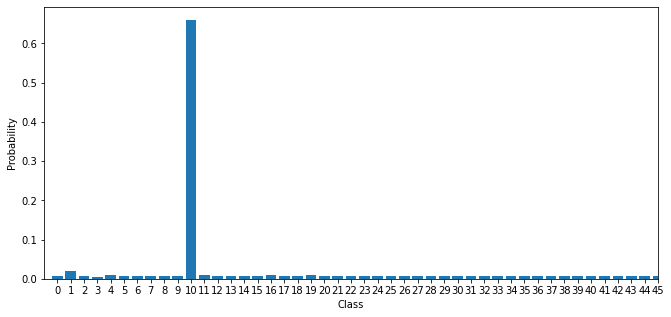

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.80      0.77      0.79       105
           2       0.71      0.85      0.77        20
           3       0.92      0.94      0.93       813
           4       0.82      0.88      0.85       474
           5       0.33      0.20      0.25         5
           6       0.93      0.93      0.93        14
           7       0.67      0.67      0.67         3
           8       0.72      0.68      0.70        38
           9       0.81      0.84      0.82        25
          10       0.93      0.90      0.92        30
          11       0.67      0.70      0.68        83
          12       0.60      0.46      0.52        13
          13       0.68      0.62      0.65        37
          14       0.12      0.50      0.20         2
          15       0.67      0.44      0.53         9
          16       0.74      0.74      0.74        99
          17       0.57    

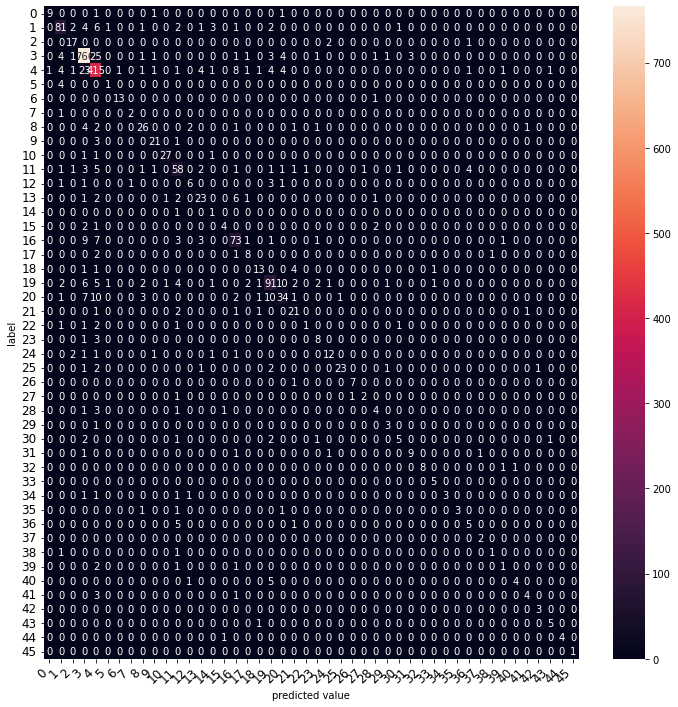

In [78]:
 # VotingClassifier 의 정확도는 0.8161  입니다.
 predicted = learnMLmodel(voting_classifier, tfidfv_5k, y_train_5k, tfidfv_test_5k, y_test_5k)
 print(classification_report(y_test_5k, predicted, zero_division=0))
 graph_confusion_matrix(voting_classifier, tfidfv_test_5k, y_test_5k) 

In [17]:
mod_5k, cb_5k, lr_5k, lsvc_5k, tree_5k, forest_5k, grbt_5k, voting_classifier_5k = train_ml(tfidfv_5k, y_train_5k, tfidfv_test_5k, y_test_5k)

나이브 베이즈 정확도: 0.6731967943009796
CNB 정확도: 0.7707034728406055


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


로지스틱 회귀 정확도: 0.8058771148708815


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


SVM 정확도: 0.7680320569902048
결정 트리 정확도: 0.6179875333926982
랜덤 포레스트 정확도: 0.701246660730187
      Iter       Train Loss   Remaining Time 
         1           1.4697           17.50m
         2     2131099.0239           17.23m
         3 113352934366748750033493137947714414201794552363528671409179356940992512.0000           17.33m
         4 645005367195105573487290209089081189090170195029150070319832395667206596719018218881024.0000           17.09m
         5 443067299530301659980374363525949995629695549691559890285869350923592723545213280554158712204202745088665306932510573934053386280801140736.0000           16.88m
         6 443067299530301659980374363525949995629695549691559890285869350923592723545213280554158712204202745088665306932510573934053386280801140736.0000           16.73m
         7 443067299530301659980374363525949995629695549691559890285869350923592723545213280554158712204202745088665306932510573934053386280801140736.0000           16.55m
         8 443067299530301659980

In [84]:
# #toarray() : array로 변환

# tfidfv_5k_arr=tfidfv_5k.toarray()
# tfidfv_5k_dense = tfidfv_5k.todense()
# tfidfv_test_5k_arr = tfidfv_test_5k.toarray()
# tfidfv_test_5k_dense = tfidfv_test_5k.todense()

In [19]:
vocab_size = 5000
word_vector_dim = 128

model_lstm = keras.Sequential()
model_lstm.add(keras.layers.Embedding(vocab_size, word_vector_dim))
model_lstm.add(keras.layers.LSTM(128))   
model_lstm.add(keras.layers.Dropout(0.1))
model_lstm.add(keras.layers.Dense(46, activation='softmax')) 

model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         640000    
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 46)                5934      
                                                                 
Total params: 777,518
Trainable params: 777,518
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_lstm.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [21]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [22]:
epochs=20
batch_size=64

history_LSTM2 = model_lstm.fit(tfidfv_5k_arr,
                    y_train_5k,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split= 0.2,
                    callbacks=  [es, mc],
                    verbose=1)

Epoch 1/20
113/113 [==============================] - 1594s 14s/step - loss: 2.5501 - accuracy: 0.3399 - val_loss: 2.4232 - val_accuracy: 0.3450
Epoch 2/20
113/113 [==============================] - 1587s 14s/step - loss: 2.4285 - accuracy: 0.3466 - val_loss: 2.4178 - val_accuracy: 0.3450
Epoch 3/20
113/113 [==============================] - 1588s 14s/step - loss: 2.4252 - accuracy: 0.3478 - val_loss: 2.4171 - val_accuracy: 0.3450
Epoch 4/20
113/113 [==============================] - 1584s 14s/step - loss: 2.4198 - accuracy: 0.3525 - val_loss: 2.4139 - val_accuracy: 0.3450
Epoch 5/20
113/113 [==============================] - 1601s 14s/step - loss: 2.4227 - accuracy: 0.3506 - val_loss: 2.4106 - val_accuracy: 0.3450
Epoch 6/20
113/113 [==============================] - 1619s 14s/step - loss: 2.4184 - accuracy: 0.3530 - val_loss: 2.4078 - val_accuracy: 0.3450
Epoch 7/20
113/113 [==============================] - 1604s 14s/step - loss: 2.4153 - accuracy: 0.3528 - val_loss: 2.4066 - val_ac

In [36]:
def plot_history(vocab_size, history_dict):
    train_acc = history_dict['accuracy']
    train_loss = history_dict['loss']
    val_acc = history_dict['val_accuracy']
    val_loss = history_dict['val_loss']
    
    epochs = range(1, len(train_acc) + 1)
    plt.plot(epochs, train_loss)
    plt.plot(epochs, train_acc)
    plt.plot(epochs, val_loss)
    plt.plot(epochs, val_acc)
    plt.legend(['train_loss', 'train_accuracy', 'val_loss', 'val_accuracy'],loc='center right')
    plt.title(f'LSTM_vocabsize={vocab_size}')
    plt.show()

In [37]:
history_lstm_dict = history_LSTM2.history

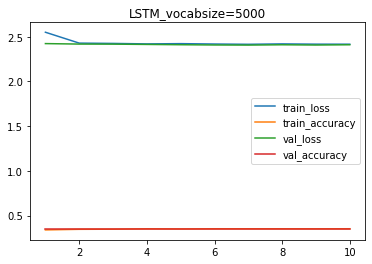

In [44]:
plot_history(5000, history_lstm_dict)

# Report

- 단어에 DTM, TD-IDF를 적용하여봄. 
- 8가지의 모델중 Voting 모델이 가장 높은 F1 score를 보였으며
5000단어에서 높은 점수를 보였음.
- 5000단어를 밀집벡트로 바꾸어 LSTM으로 훈련시켜보았으나, 모델 설계가 잘못되었는지 아주 형편없이 나옴.
- 그냥...word2vector를 사용하는 것이 더 편하고 좋은 것으로 보임..